In [1]:
#Importing libraries
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import plotly.graph_objs as go
from plotly.offline import plot

#for plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
from google.colab import files
uploaded = files.upload() 

Saving HistoricalData_TSLA.csv to HistoricalData_TSLA.csv


In [3]:
#Reading data
import io
tsla = pd.read_csv(io.BytesIO(uploaded['HistoricalData_TSLA.csv']),encoding='ISO-8859-1')  
print(tsla)

            Date Close/Last    Volume      Open     High        Low
0     06/09/2021    $598.78  16584570   $602.17  $611.79  $597.6301
1     06/08/2021    $603.59  26053410   $623.01  $623.09     $595.5
2     06/07/2021    $605.13  22543680  $591.825     $610    $582.88
3     06/04/2021    $599.05  24036900   $579.71  $600.61     $577.2
4     06/03/2021    $572.84  30111890    $601.8  $604.55    $571.22
...          ...        ...       ...       ...      ...        ...
2511  06/16/2011       $5.3   9210620    $5.534     $5.6     $5.148
2512  06/15/2011     $5.464   6723390    $5.688    $5.69     $5.414
2513  06/14/2011      $5.72   7866000    $5.708    $5.94     $5.704
2514  06/13/2011     $5.686   8566960    $5.614   $5.776     $5.576
2515  06/10/2011     $5.572   7832660    $5.504  $5.6598      $5.47

[2516 rows x 6 columns]


In [4]:
tsla.head(10)

,Date,Close/Last,Volume,Open,High,Low
0,06/09/2021,$598.78,16584570,$602.17,$611.79,$597.6301
1,06/08/2021,$603.59,26053410,$623.01,$623.09,$595.5
2,06/07/2021,$605.13,22543680,$591.825,$610,$582.88
3,06/04/2021,$599.05,24036900,$579.71,$600.61,$577.2
4,06/03/2021,$572.84,30111890,$601.8,$604.55,$571.22
5,06/02/2021,$605.12,23302780,$620.13,$623.36,$599.14
6,06/01/2021,$623.9,18084890,$627.8,$633.8,$620.55
7,05/28/2021,$625.22,22737040,$628.5,$635.59,$622.38
8,05/27/2021,$630.85,26370590,$620.24,$631.13,$616.21
9,05/26/2021,$619.13,28639310,$607.56,$626.17,$601.5


In [5]:
tsla.tail()

,Date,Close/Last,Volume,Open,High,Low
2511,06/16/2011,$5.3,9210620,$5.534,$5.6,$5.148
2512,06/15/2011,$5.464,6723390,$5.688,$5.69,$5.414
2513,06/14/2011,$5.72,7866000,$5.708,$5.94,$5.704
2514,06/13/2011,$5.686,8566960,$5.614,$5.776,$5.576
2515,06/10/2011,$5.572,7832660,$5.504,$5.6598,$5.47


In [7]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2516 non-null   object
 1   Close/Last  2516 non-null   object
 2   Volume      2516 non-null   int64 
 3   Open        2516 non-null   object
 4   High        2516 non-null   object
 5   Low         2516 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [8]:
tsla['Date'] = pd.to_datetime(tsla['Date'])
#convert object type to float
tsla=tsla.rename(columns={'Close/Last':'Close'})
tsla['Close']=tsla['Close'].replace('[\$]','',regex=True).astype(float)
tsla[tsla.columns[3:]]=tsla[tsla.columns[3:]].replace('[\$]','',regex=True).astype(float)
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2516 non-null   datetime64[ns]
 1   Close   2516 non-null   float64       
 2   Volume  2516 non-null   int64         
 3   Open    2516 non-null   float64       
 4   High    2516 non-null   float64       
 5   Low     2516 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


In [9]:
print(f'Dataframe contains stock prices from {tsla.Date.min()} to {tsla.Date.max()}')
print(f'Total no.of days = {(tsla.Date.max()- tsla.Date.min()).days} days')

Dataframe contains stock prices from 2011-06-10 00:00:00 to 2021-06-09 00:00:00
Total no.of days = 3652 days


In [11]:
tsla.describe()

,Close,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,94.310514,3.407957e+07,94.287201,96.488776,92.014969
std,162.504123,2.891964e+07,162.519434,166.806403,158.166102
min,4.390000,1.197975e+06,4.386000,4.622000,4.300000
25%,33.384000,1.573979e+07,33.667500,34.318000,32.628775
50%,47.038000,2.738053e+07,47.009000,47.798000,46.160000
75%,65.046000,4.280184e+07,64.774500,65.869500,63.638500
max,883.090000,3.046938e+08,891.380000,900.400000,871.600000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



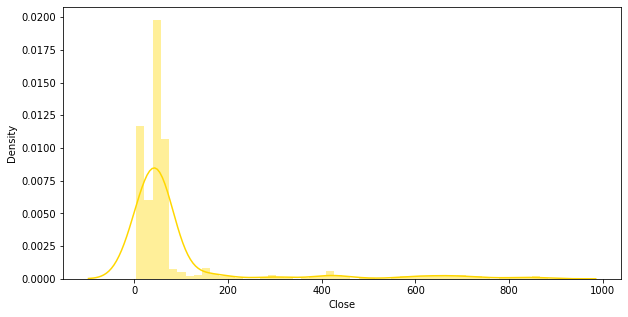

In [13]:
#Outlier detection
plt.figure(figsize=(10,5))
sns.distplot(tsla['Close'],color = 'gold')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



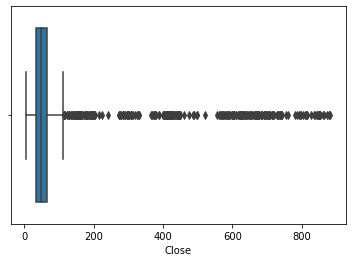

In [14]:
sns.boxplot(tsla['Close'])

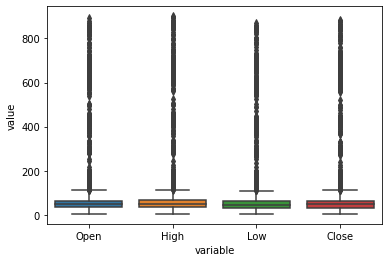

In [15]:
col = ['Open','High','Low','Close']
ft = tsla[col]
sns.boxplot(x="variable", y="value",data=pd.melt(ft))

In [16]:
Q1=tsla["Close"].quantile(0.25)
Q3=tsla["Close"].quantile(0.75)
print(Q1,Q3)
iqr=Q3-Q1
iqr

33.384 65.046


31.662000000000006

In [17]:
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr
print(upper_limit,lower_limit)

112.53900000000002 -14.109000000000009


In [18]:
new_df = tsla[tsla['Close'] < lower_limit] 
new_df.shape

(0, 6)

In [19]:
new_df = tsla[tsla['Close'] > upper_limit] 
new_df.shape

(328, 6)

In [20]:
new_df = tsla[tsla['Close'] < upper_limit] 
new_df.shape

(2188, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:

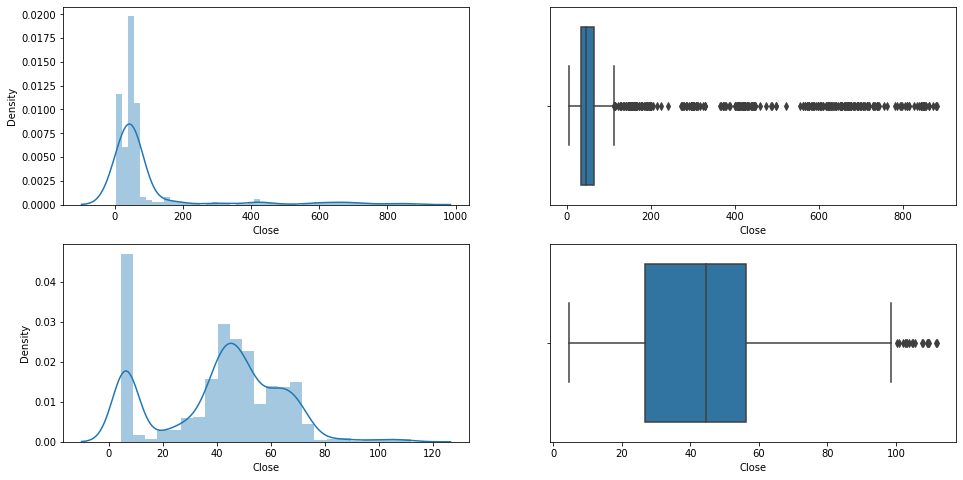

In [21]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(tsla['Close'])
plt.subplot(2,2,2)
sns.boxplot(tsla['Close'])
plt.subplot(2,2,3)
sns.distplot(new_df['Close'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Close'])
plt.show()

In [22]:
new_df_cap = tsla.copy()
new_df_cap['Close'] = np.where(
    new_df_cap['Close'] > upper_limit,upper_limit,
    np.where(new_df_cap['Close'] < lower_limit,lower_limit,
        new_df_cap['Close']
    )
)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:

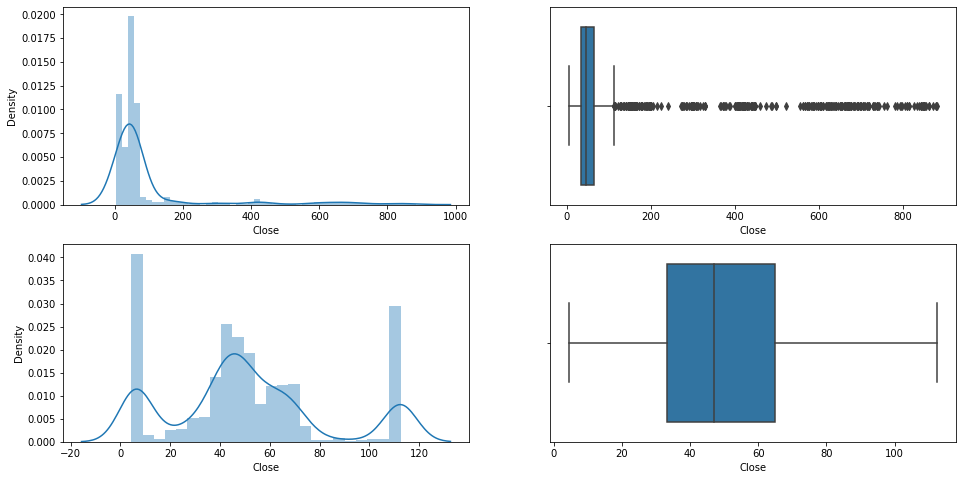

In [23]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(tsla['Close'])
plt.subplot(2,2,2)
sns.boxplot(tsla['Close'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Close'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Close'])
plt.show()

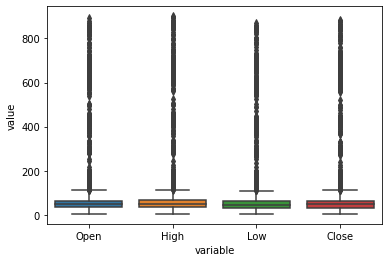

In [25]:
col = ['Open','High','Low','Close']
ft = tsla[col]
sns.boxplot(x="variable", y="value",data=pd.melt(ft))

In [26]:
#Layout for the plot
layout=go.Layout(title='Stock prices of Tesla',xaxis=dict(title='Date',titlefont=dict(family='Courier New, monospace',size=19,color='#7f7f7f')) ,
                 yaxis=dict(title='Close',titlefont=dict(family='Courier New, monospace',size=19,color='#7f7f7f')))
tsla_data = [{'x':tsla['Date'], 'y':tsla['Close']}]
plot = go.Figure(data=tsla_data,layout=layout)
plot.show(renderer="colab")

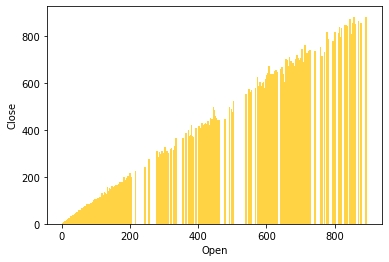

In [28]:
plt.bar(tsla['Open'], tsla['Close'],width = 5.0, align='center',color='#ffd343')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

Text(0.5, 1.0, 'Open vs Close')

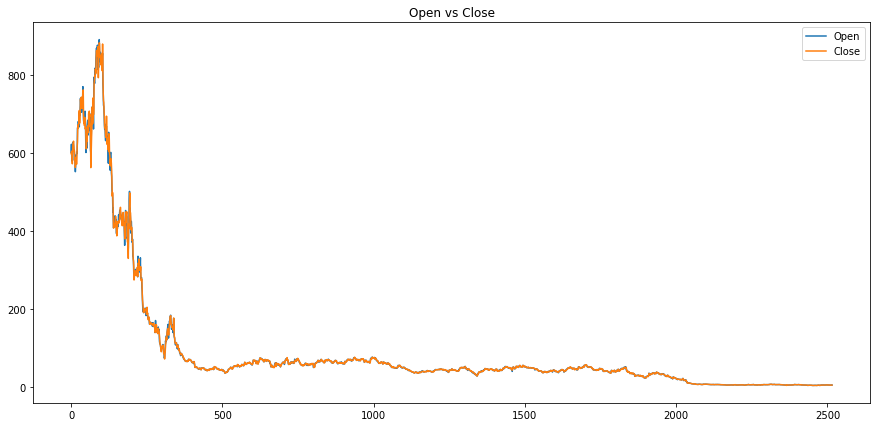

In [29]:
tsla['Open'].plot(label='Open',figsize=(15,7))
tsla['Close'].plot(label='Close')
plt.legend()
plt.title("Open vs Close")

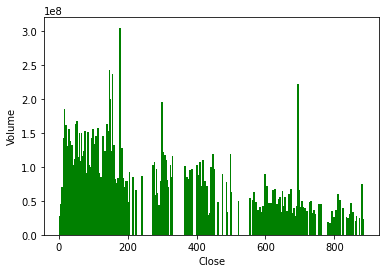

In [30]:
plt.bar(tsla['Close'], tsla['Volume'],width = 5.0, align='center',color='Green')
plt.xlabel('Close')
plt.ylabel('Volume')
plt.show()

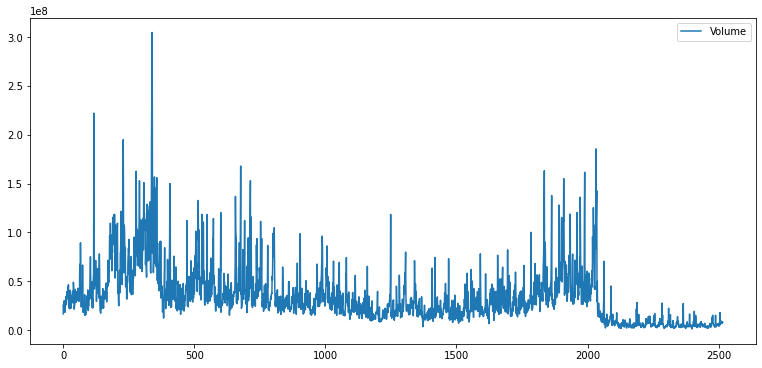

In [31]:
tsla['Volume'].plot(label='Volume',figsize=(13,6))
plt.legend()

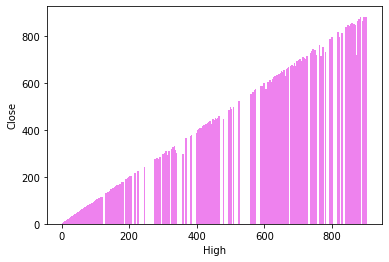

In [32]:
plt.bar(tsla['High'], tsla['Close'],width = 5.0, align='center',color='violet')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

Text(0.5, 1.0, 'High vs Close')

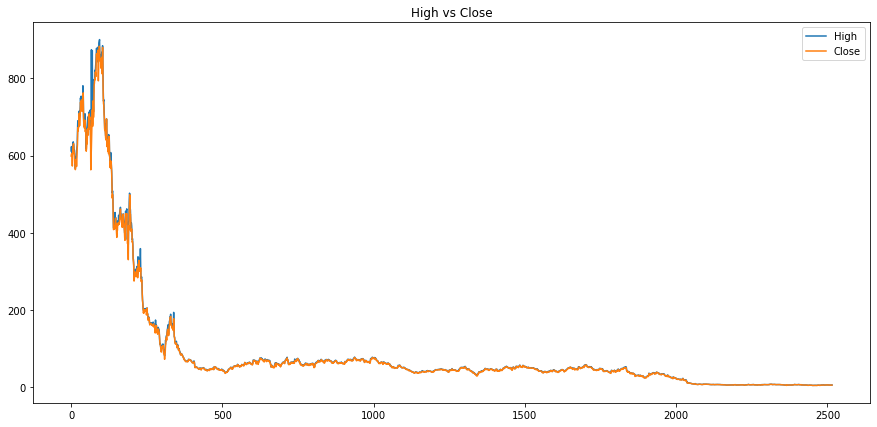

In [33]:
tsla['High'].plot(label='High',figsize=(15,7))
tsla['Close'].plot(label='Close')
plt.legend()
plt.title("High vs Close")

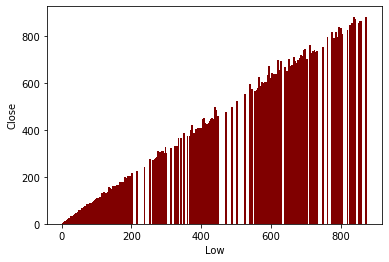

In [35]:
plt.bar(tsla['Low'], tsla['Close'],width = 5.0, align='center',color='maroon')
plt.xlabel('Low')
plt.ylabel('Close')
plt.show()

Text(0.5, 1.0, 'Close vs Low')

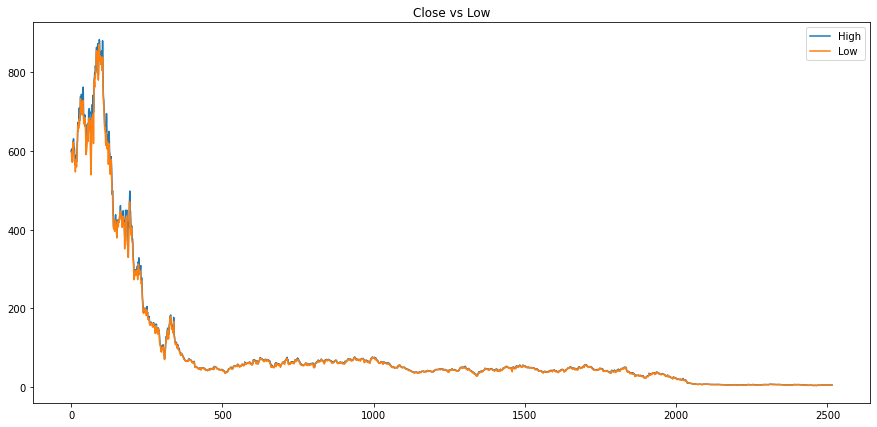

In [36]:
tsla['Close'].plot(label='High',figsize=(15,7))
tsla['Low'].plot(label='Low')
plt.legend()
plt.title("Close vs Low")

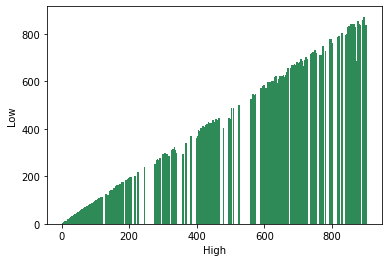

In [37]:
plt.bar(tsla['High'], tsla['Low'],width = 5.0, align='center',color = 'seagreen')
plt.xlabel('High')
plt.ylabel('Low')
plt.show()

Text(0.5, 1.0, 'High vs Low')

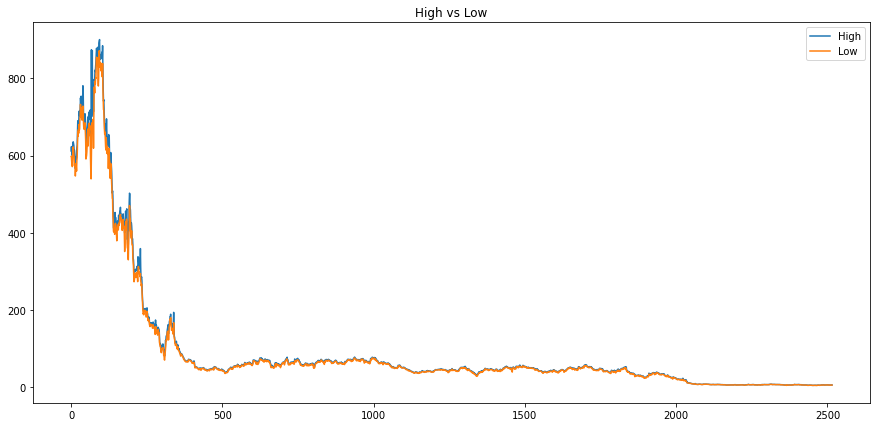

In [38]:
tsla['High'].plot(label='High',figsize=(15,7))
tsla['Low'].plot(label='Low')
plt.legend()
plt.title("High vs Low")

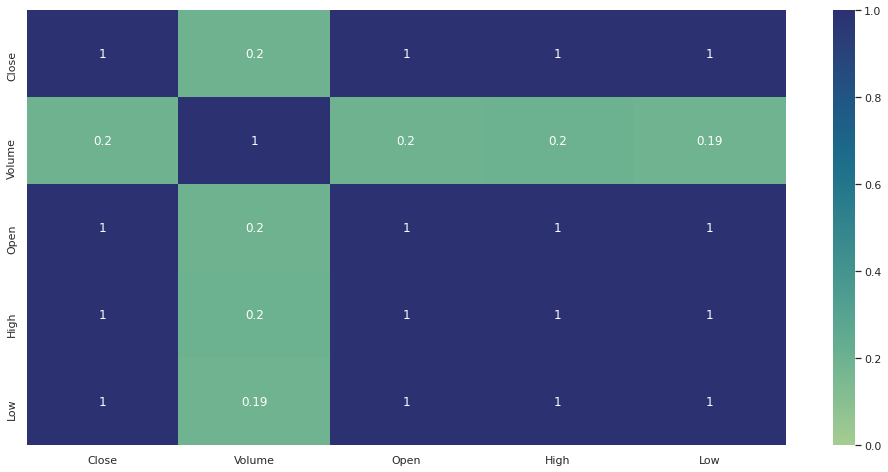

In [39]:
sns.set_theme()
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(tsla.corr(), annot = True ,vmin=0, vmax=1,cmap ='crest')

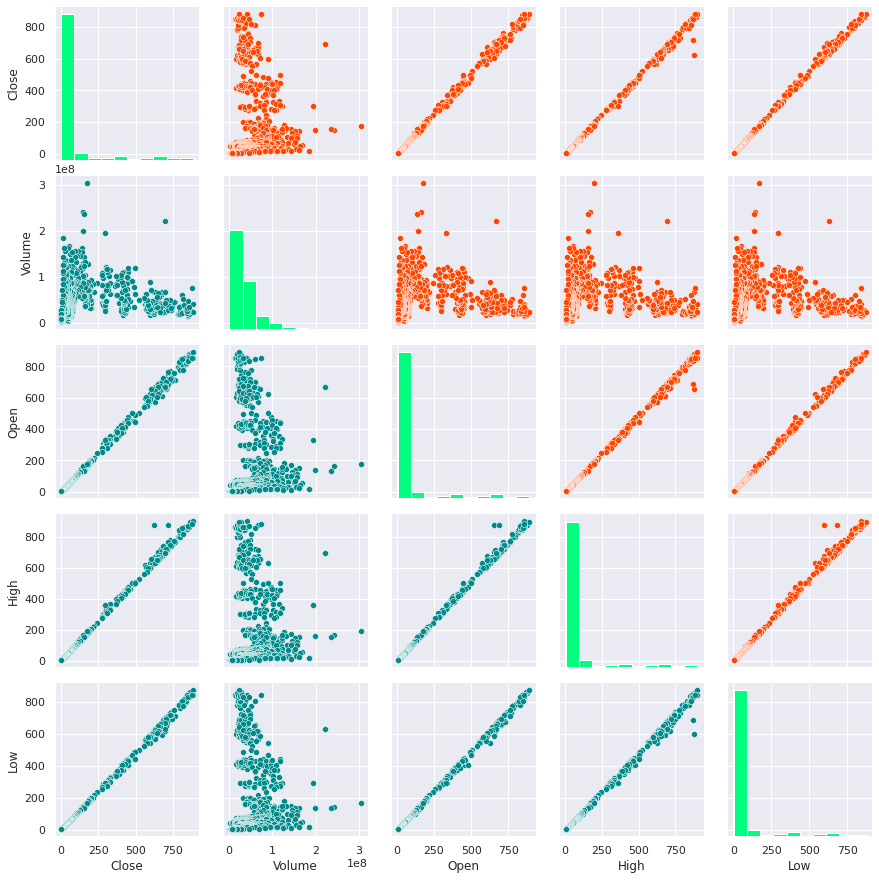

In [40]:
g = sns.PairGrid(tsla)
g.map_upper(sns.scatterplot,color='orangered')
g.map_lower(sns.scatterplot, color='darkcyan')
g.map_diag(plt.hist,color = 'springgreen')

Text(0.5, 1.0, 'Relation between Close, Open, High and Low ')

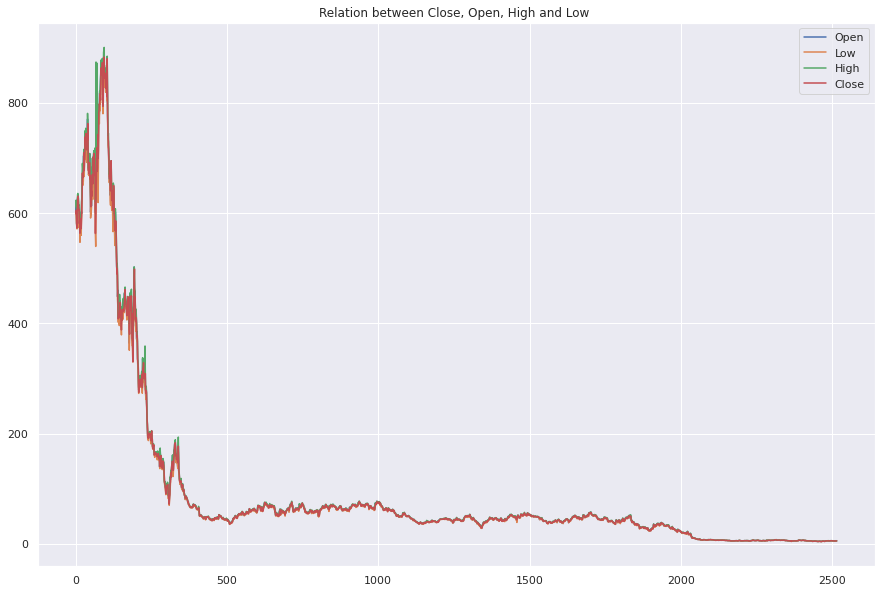

In [41]:
tsla['Open'].plot(label='Open',figsize=(15,10))
tsla['Low'].plot(label='Low')
tsla['High'].plot(label='High')
tsla['Close'].plot(label='Close')
plt.legend()
plt.title("Relation between Close, Open, High and Low ")

In [42]:
uploaded = files.upload()

Saving Headlines_2015.csv to Headlines_2015.csv
Saving Headlines_2016.csv to Headlines_2016.csv
Saving Headlines_2017.csv to Headlines_2017.csv
Saving Headlines_2018.csv to Headlines_2018.csv
Saving Headlines_2019.csv to Headlines_2019.csv
Saving Headlines_2020.csv to Headlines_2020.csv
Saving Headlines_2021.csv to Headlines_2021.csv


In [43]:
df1 = pd.read_csv(io.BytesIO(uploaded['Headlines_2015.csv']),encoding='ISO-8859-1')
df2 = pd.read_csv(io.BytesIO(uploaded['Headlines_2016.csv']),encoding='ISO-8859-1')
df3 = pd.read_csv(io.BytesIO(uploaded['Headlines_2017.csv']),encoding='ISO-8859-1')
df4 = pd.read_csv(io.BytesIO(uploaded['Headlines_2018.csv']),encoding='ISO-8859-1')
df5 = pd.read_csv(io.BytesIO(uploaded['Headlines_2019.csv']),encoding='ISO-8859-1')
df6 = pd.read_csv(io.BytesIO(uploaded['Headlines_2020.csv']),encoding='ISO-8859-1')
df7 = pd.read_csv(io.BytesIO(uploaded['Headlines_2021.csv']),encoding='ISO-8859-1')

In [44]:
news=pd.concat([df1,df2,df3,df4,df5,df6,df7])
news

,Date,Headlines
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
1,2015-01-02,What to expect from Apple in 2015 beyond its s...
2,2015-01-03,Mountie: An inexpensive and innovative way to ...
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C..."
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
...,...,...
169,2021-06-19,Best pre-Prime Day smartwatch deals on Apple W...
170,2021-06-20,iPhone 13 rumors: As Apple's fall event gets c...
171,2021-06-21,Apple is shortening new free TV Plus trials fr...
172,2021-06-22,Google likely to soon face antitrust claims ov...


In [45]:
news.isnull().sum()

Date         0
Headlines    0
dtype: int64

In [46]:
news.head(10)

,Date,Headlines
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
1,2015-01-02,What to expect from Apple in 2015 beyond its s...
2,2015-01-03,Mountie: An inexpensive and innovative way to ...
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C..."
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
5,2015-01-06,"Technology Transforming Cars Into ""Phones On W..."
6,2015-01-07,Apple issues fourth developer beta of OS X 10....
7,2015-01-08,Apple company recalls 2014 shipments after lin...
8,2015-01-09,Samsung is reportedly making a secret new chip...
9,2015-01-10,"Eight years ago, Steve Jobs unveiled iPhone an..."


In [47]:
news.tail()

,Date,Headlines
169,2021-06-19,Best pre-Prime Day smartwatch deals on Apple W...
170,2021-06-20,iPhone 13 rumors: As Apple's fall event gets c...
171,2021-06-21,Apple is shortening new free TV Plus trials fr...
172,2021-06-22,Google likely to soon face antitrust claims ov...
173,2021-06-23,French court sets date in Apple case over App ...


In [48]:
news.dtypes

Date         object
Headlines    object
dtype: object

In [49]:
news['Date']=pd.to_datetime(news['Date'],format='%Y/%m/%d')
news["Headlines"]=news["Headlines"].astype(str)
news.dtypes

Date         datetime64[ns]
Headlines            object
dtype: object

In [50]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [51]:
news["Headlines"]=news["Headlines"].astype(str)
news['Headlines']=news['Headlines'].apply(lambda x: x.lower())

In [52]:
import string
def char_rmvl(text):                 #Removing all char except a-z and A-Z and replace them with ' '
    new=[char for char in text if char not in string.punctuation]
    new_str=''.join(new)
    new.clear()
    return new_str
news["Headlines"]=news["Headlines"].astype(str)
news['Headlines']=news['Headlines'].apply(char_rmvl)

In [53]:
stop = stopwords.words('english')
news['Headlines'] = news['Headlines'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
news

,Date,Headlines
0,2015-01-01,expect apple inc 2015 1 reason might wrong app...
1,2015-01-02,expect apple 2015 beyond smartwatch amazonquot...
2,2015-01-03,mountie inexpensive innovative way attach ipho...
3,2015-01-04,donald yacktman sources moats concern applequo...
4,2015-01-05,simfree iphone 6 6 plus reportedly debuting to...
...,...,...
169,2021-06-19,best preprime day smartwatch deals apple watch...
170,2021-06-20,iphone 13 rumors apples fall event gets closer...
171,2021-06-21,apple shortening new free tv plus trials year ...
172,2021-06-22,google likely soon face antitrust claims play ...


In [54]:
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer  #used to perform lemmatization
def lemmat(text):
    lemma=WordNetLemmatizer()
    words=word_tokenize(text)
    return ' '.join([lemma.lemmatize(word) for word in words])
news['Headlines'] = news['Headlines'].apply(lemmat)
news

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Date,Headlines
0,2015-01-01,expect apple inc 2015 1 reason might wrong app...
1,2015-01-02,expect apple 2015 beyond smartwatch amazonquot...
2,2015-01-03,mountie inexpensive innovative way attach ipho...
3,2015-01-04,donald yacktman source moat concern applequots...
4,2015-01-05,simfree iphone 6 6 plus reportedly debuting to...
...,...,...
169,2021-06-19,best preprime day smartwatch deal apple watch ...
170,2021-06-20,iphone 13 rumor apple fall event get closer se...
171,2021-06-21,apple shortening new free tv plus trial year t...
172,2021-06-22,google likely soon face antitrust claim play s...


In [55]:
tsla=pd.merge(tsla,news,on=['Date'],how='outer')
tsla

,Date,Close,Volume,Open,High,Low,Headlines
0,2021-06-09,598.78,16584570.0,602.170,611.79,597.6301,athenahealth set support io 15 feature allows ...
1,2021-06-08,603.59,26053410.0,623.010,623.09,595.5000,apple chinese manufacturer talk u car battery ...
2,2021-06-07,605.13,22543680.0,591.825,610.00,582.8800,applequots new quotprivate relayquot feature a...
3,2021-06-04,599.05,24036900.0,579.710,600.61,577.2000,global equity nearly grasp alltime record doll...
4,2021-06-03,572.84,30111890.0,601.800,604.55,571.2200,buy rh stock dip q1 earnings growth wwdc 2021 ...
...,...,...,...,...,...,...,...
3279,2021-06-19,NaN,NaN,NaN,NaN,NaN,best preprime day smartwatch deal apple watch ...
3280,2021-06-20,NaN,NaN,NaN,NaN,NaN,iphone 13 rumor apple fall event get closer se...
3281,2021-06-21,NaN,NaN,NaN,NaN,NaN,apple shortening new free tv plus trial year t...
3282,2021-06-22,NaN,NaN,NaN,NaN,NaN,google likely soon face antitrust claim play s...


In [56]:
tsla.isnull().sum()

Date           0
Close        748
Volume       748
Open         748
High         748
Low          748
Headlines    919
dtype: int64

In [57]:
tsla['Close'].fillna(tsla['Close'].mean(), inplace=True)
tsla['Volume'].fillna(tsla['Volume'].mean(), inplace=True)
tsla['Open'].fillna(tsla['Open'].mean(), inplace=True)
tsla['High'].fillna(tsla['High'].mean(), inplace=True)
tsla['Low'].fillna(tsla['Low'].mean(), inplace=True)

In [58]:
tsla=tsla.fillna('')
tsla.sort_values(ascending = True ,by = 'Date')
tsla

,Date,Close,Volume,Open,High,Low,Headlines
0,2021-06-09,598.780000,1.658457e+07,602.170000,611.790000,597.630100,athenahealth set support io 15 feature allows ...
1,2021-06-08,603.590000,2.605341e+07,623.010000,623.090000,595.500000,apple chinese manufacturer talk u car battery ...
2,2021-06-07,605.130000,2.254368e+07,591.825000,610.000000,582.880000,applequots new quotprivate relayquot feature a...
3,2021-06-04,599.050000,2.403690e+07,579.710000,600.610000,577.200000,global equity nearly grasp alltime record doll...
4,2021-06-03,572.840000,3.011189e+07,601.800000,604.550000,571.220000,buy rh stock dip q1 earnings growth wwdc 2021 ...
...,...,...,...,...,...,...,...
3279,2021-06-19,94.100336,3.412211e+07,94.078007,96.268169,91.815939,best preprime day smartwatch deal apple watch ...
3280,2021-06-20,94.100336,3.412211e+07,94.078007,96.268169,91.815939,iphone 13 rumor apple fall event get closer se...
3281,2021-06-21,94.100336,3.412211e+07,94.078007,96.268169,91.815939,apple shortening new free tv plus trial year t...
3282,2021-06-22,94.100336,3.412211e+07,94.078007,96.268169,91.815939,google likely soon face antitrust claim play s...


In [59]:
tsla[:].isnull().sum()

Date         0
Close        0
Volume       0
Open         0
High         0
Low          0
Headlines    0
dtype: int64

In [60]:
tsla.duplicated().sum()

23

In [61]:
tsla.drop_duplicates(inplace=True,ignore_index=True)
tsla.duplicated().sum()

0

In [62]:
tsla.dtypes

Date         datetime64[ns]
Close               float64
Volume              float64
Open                float64
High                float64
Low                 float64
Headlines            object
dtype: object

In [63]:
tsla.set_index("Date", inplace = True)
tsla.head()

,Close,Volume,Open,High,Low,Headlines
Date,,,,,,
2021-06-09,598.78,16584570.0,602.170,611.79,597.6301,athenahealth set support io 15 feature allows ...
2021-06-08,603.59,26053410.0,623.010,623.09,595.5000,apple chinese manufacturer talk u car battery ...
2021-06-07,605.13,22543680.0,591.825,610.00,582.8800,applequots new quotprivate relayquot feature a...
2021-06-04,599.05,24036900.0,579.710,600.61,577.2000,global equity nearly grasp alltime record doll...
2021-06-03,572.84,30111890.0,601.800,604.55,571.2200,buy rh stock dip q1 earnings growth wwdc 2021 ...


In [64]:
tsla.sort_values(ascending = True ,by = 'Date')
tsla

,Close,Volume,Open,High,Low,Headlines
Date,,,,,,
2021-06-09,598.780000,1.658457e+07,602.170000,611.790000,597.630100,athenahealth set support io 15 feature allows ...
2021-06-08,603.590000,2.605341e+07,623.010000,623.090000,595.500000,apple chinese manufacturer talk u car battery ...
2021-06-07,605.130000,2.254368e+07,591.825000,610.000000,582.880000,applequots new quotprivate relayquot feature a...
2021-06-04,599.050000,2.403690e+07,579.710000,600.610000,577.200000,global equity nearly grasp alltime record doll...
2021-06-03,572.840000,3.011189e+07,601.800000,604.550000,571.220000,buy rh stock dip q1 earnings growth wwdc 2021 ...
...,...,...,...,...,...,...
2021-06-19,94.100336,3.412211e+07,94.078007,96.268169,91.815939,best preprime day smartwatch deal apple watch ...
2021-06-20,94.100336,3.412211e+07,94.078007,96.268169,91.815939,iphone 13 rumor apple fall event get closer se...
2021-06-21,94.100336,3.412211e+07,94.078007,96.268169,91.815939,apple shortening new free tv plus trial year t...


In [65]:
tsla.duplicated().sum()

2

In [66]:
tsla

,Close,Volume,Open,High,Low,Headlines
Date,,,,,,
2021-06-09,598.780000,1.658457e+07,602.170000,611.790000,597.630100,athenahealth set support io 15 feature allows ...
2021-06-08,603.590000,2.605341e+07,623.010000,623.090000,595.500000,apple chinese manufacturer talk u car battery ...
2021-06-07,605.130000,2.254368e+07,591.825000,610.000000,582.880000,applequots new quotprivate relayquot feature a...
2021-06-04,599.050000,2.403690e+07,579.710000,600.610000,577.200000,global equity nearly grasp alltime record doll...
2021-06-03,572.840000,3.011189e+07,601.800000,604.550000,571.220000,buy rh stock dip q1 earnings growth wwdc 2021 ...
...,...,...,...,...,...,...
2021-06-19,94.100336,3.412211e+07,94.078007,96.268169,91.815939,best preprime day smartwatch deal apple watch ...
2021-06-20,94.100336,3.412211e+07,94.078007,96.268169,91.815939,iphone 13 rumor apple fall event get closer se...
2021-06-21,94.100336,3.412211e+07,94.078007,96.268169,91.815939,apple shortening new free tv plus trial year t...


In [67]:
tsla[:].isnull().sum()

Close        0
Volume       0
Open         0
High         0
Low          0
Headlines    0
dtype: int64

In [68]:
tsla.tail()

,Close,Volume,Open,High,Low,Headlines
Date,,,,,,
2021-06-19,94.100336,3.412211e+07,94.078007,96.268169,91.815939,best preprime day smartwatch deal apple watch ...
2021-06-20,94.100336,3.412211e+07,94.078007,96.268169,91.815939,iphone 13 rumor apple fall event get closer se...
2021-06-21,94.100336,3.412211e+07,94.078007,96.268169,91.815939,apple shortening new free tv plus trial year t...
2021-06-22,94.100336,3.412211e+07,94.078007,96.268169,91.815939,google likely soon face antitrust claim play s...
2021-06-23,94.100336,3.412211e+07,94.078007,96.268169,91.815939,french court set date apple case app store dev...


In [69]:
print(f'Dataframe contains stock prices from {tsla.index.min()} to {tsla.index.max()}')
print(f'Total no.of days = {(tsla.index.max()- tsla.index.min()).days} days')

Dataframe contains stock prices from 2011-06-10 00:00:00 to 2021-06-23 00:00:00
Total no.of days = 3666 days


In [70]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [71]:
sid = SentimentIntensityAnalyzer()

# calculating sentiment scores
tsla['compound'] = tsla['Headlines'].apply(lambda x: sid.polarity_scores(x)['compound'])
tsla['negative'] = tsla['Headlines'].apply(lambda x: sid.polarity_scores(x)['neg'])
tsla['neutral'] = tsla['Headlines'].apply(lambda x: sid.polarity_scores(x)['neu'])
tsla['positive'] = tsla['Headlines'].apply(lambda x: sid.polarity_scores(x)['pos'])

In [72]:
from scipy import stats

In [73]:
from sklearn.metrics import accuracy_score,classification_report
from textblob import TextBlob
def getsubj(text):
  return TextBlob(text).sentiment.subjectivity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity

In [74]:
tsla['Subjectivity']=tsla['Headlines'].apply(getsubj)
tsla['Polarity']=tsla['Headlines'].apply(getpolarity)
tsla


,Close,Volume,Open,High,Low,Headlines,compound,negative,neutral,positive,Subjectivity,Polarity
Date,,,,,,,,,,,,
2021-06-09,598.780000,1.658457e+07,602.170000,611.790000,597.630100,athenahealth set support io 15 feature allows ...,0.9905,0.051,0.850,0.099,0.372039,0.111292
2021-06-08,603.590000,2.605341e+07,623.010000,623.090000,595.500000,apple chinese manufacturer talk u car battery ...,0.9972,0.037,0.830,0.133,0.441778,0.148372
2021-06-07,605.130000,2.254368e+07,591.825000,610.000000,582.880000,applequots new quotprivate relayquot feature a...,0.9972,0.023,0.869,0.109,0.472968,0.174002
2021-06-04,599.050000,2.403690e+07,579.710000,600.610000,577.200000,global equity nearly grasp alltime record doll...,0.9953,0.038,0.849,0.113,0.406474,0.112212
2021-06-03,572.840000,3.011189e+07,601.800000,604.550000,571.220000,buy rh stock dip q1 earnings growth wwdc 2021 ...,0.9926,0.059,0.822,0.119,0.323765,0.088232
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-19,94.100336,3.412211e+07,94.078007,96.268169,91.815939,best preprime day smartwatch deal apple watch ...,0.9910,0.029,0.796,0.175,0.391640,0.148395
2021-06-20,94.100336,3.412211e+07,94.078007,96.268169,91.815939,iphone 13 rumor apple fall event get closer se...,0.9947,0.039,0.777,0.184,0.372926,0.308141
2021-06-21,94.100336,3.412211e+07,94.078007,96.268169,91.815939,apple shortening new free tv plus trial year t...,0.9988,0.040,0.777,0.183,0.362845,0.272403


In [75]:
tsla = tsla[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume','Subjectivity','Polarity']]
tsla.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume,Subjectivity,Polarity
Date,,,,,,,,,,,
2021-06-09,598.78,0.9905,0.051,0.850,0.099,602.170,611.79,597.6301,16584570.0,0.372039,0.111292
2021-06-08,603.59,0.9972,0.037,0.830,0.133,623.010,623.09,595.5000,26053410.0,0.441778,0.148372
2021-06-07,605.13,0.9972,0.023,0.869,0.109,591.825,610.00,582.8800,22543680.0,0.472968,0.174002
2021-06-04,599.05,0.9953,0.038,0.849,0.113,579.710,600.61,577.2000,24036900.0,0.406474,0.112212
2021-06-03,572.84,0.9926,0.059,0.822,0.119,601.800,604.55,571.2200,30111890.0,0.323765,0.088232


In [76]:
tsla.dtypes

Close           float64
compound        float64
negative        float64
neutral         float64
positive        float64
Open            float64
High            float64
Low             float64
Volume          float64
Subjectivity    float64
Polarity        float64
dtype: object

In [77]:
X = tsla.loc[:,'compound':'Polarity']
y = tsla['Close']

In [78]:
from sklearn.model_selection import train_test_split #for building regression model
from sklearn.preprocessing import MinMaxScaler  #For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse   #For model evaluation
from sklearn.metrics import r2_score

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [80]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
print(l.intercept_)

-0.5525241042245455


In [82]:
yhat=l.predict(X_test)

In [83]:
# Actual vs Predicted prizes
dframe = pd.DataFrame(y_test,yhat)
dfr=pd.DataFrame({"Actual_price":y_test,"Predicted_price":yhat})
dfr

,Actual_price,Predicted_price
Date,,
2016-03-25,94.100336,94.092630
2015-06-16,50.624000,50.124104
2016-10-16,94.100336,94.097874
2017-11-06,60.556000,60.438951
2017-01-21,94.100336,93.853594
...,...,...
2017-05-12,64.962000,65.007299
2021-04-13,762.320000,741.649767
2017-01-20,48.946000,49.025427


In [84]:
l.score(X_test,y_test)*100

99.91921983724474

In [85]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train,l.predict(X_train))}\t{r2_score(y_test,l.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.9994621539805131	0.9991921983724473



In [86]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.9991922 , 0.99966863, 0.99956867, 0.99939167, 0.99962756])

In [88]:
import datetime
last_day = tsla.index[-1]
next_day = last_day + datetime.timedelta(days = 1)
print(next_day)

2021-06-24 00:00:00


In [89]:
X.columns

Index(['compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low',
       'Volume', 'Subjectivity', 'Polarity'],
      dtype='object')

In [93]:
def Convert(Headlines):
    Headline = list(Headlines.split("-"))
    return Headline

def filter(Headline):
    Head = [ x.lower() for x in Headline]
    Head = [char_rmvl(x) for x in Head]
    Head = [' '.join([word for word in s.split() if word not in (stop)]) for s in Head]
    Head = [lemmat(s) for s in Head]
    return Head

def sent_anls(Head):
    compound = [sid.polarity_scores(x)['compound'] for x in Head]
    negative = [sid.polarity_scores(x)['neg'] for x in Head]
    neutral = [sid.polarity_scores(x)['neu'] for x in Head]
    positive = [sid.polarity_scores(x)['pos'] for x in Head]
    subjectivity = [getsubj(x) for x in Head]
    polarity = [getpolarity(x) for x in Head]

    return compound,negative,neutral,positive,subjectivity,polarity




def predict_price(Open,High,Low,Volume,Headlines):
    head = filter(Headlines)
    cmpd,negt,neut,post,subj,pol = sent_anls(head)
    af = pd.DataFrame()
    af['compound'] = cmpd
    af['negative'] = negt
    af['neutral'] = neut
    af['positive'] = post
    af['Open'] = Open 
    af['High'] = High
    af['Low'] = Low
    af['Volume'] = Volume
    af['Subjectivity'] = subj
    af['Polarity'] = pol
    return l.predict(af)[0]

In [96]:
prediction = predict_price(3272.87,3297.5800,3270.7000,2455530,'athenahealth is set to support the iOS 15 Feature that allows Patients to Share their Apple Health app Data with their Providers Buy Adobe Stock Before Q2 Earnings as a Long-Term Tech Hold? WWDC 2021: Apple Quietly Reinforces Its Moat EU trustbusters target Apple&quot;s Siri and other voice assistants Apple&quot;s First AR Headset To Launch In Q2 of 2022 Apple&quot;s First AR Headset To Launch In Q2 of 2022 The U.S. House of Representatives is working to introduce Five Antitrust Bills in the next week that will Squarely affect Apple and its App Store Carolyn Everson has left Facebook and is reportedly eyeing a CEO role Apple Podcasts to Launch In-app Subscriptions Globally On June 15: Report Feature: Why Did Fastly Stock Soar on the Day of the Outage? Think Apple. Several macOS Monterey Features Unavailable on Intel-Based Macs Several macOS Monterey Features Unavailable on Intel-Based Macs Apple may have accidentally confirmed the existence of an M1X MacBook Pro Apple and Facebook need each other more than they&quot;d ever admit Apple is Set to Launch its Podcasts Subscriptions Platform Next Week EU Antitrust Watchdog Raise Concerns Overs Alexa, Siri, Google&quot;s Voice Assistant Dominance: Reuters The creator economy is running into the Apple Tax - this startup is fighting back Facebook first-ever smartwatch will reportedly have two cameras and roll out next summer The Newton lives, kinda: Boffin turns Apple eMate 300 into Raspberry Pi laptop Mirrored Apple (mAAPL) Trading Up 2.2% This Week Lose the use of Apple&quot;s iCloud, and you lose more than storage Early Prime Day Apple Watch deals: Save $70 on a Series 6     - CNET Applebee&quot;s offered free appetizers in hopes of luring in 10,000 job candidates and more than 40,000 applied Pro: Facebook stock is still trading at a &quot;reasonable price&quot; Stock Market Today With Jim Cramer: FAANG and Clover Health Apple Podcasts subscriptions rolling out next week Facebook aiming smartwatch at summer 2022 release, with two cameras Apple&quot;s most exciting WWDC 2021 announcements for iPhone, Mac and more     - CNET Here are the most important new features coming to your iPhone this fall Apple Podcasts says it&quot;ll launch in-app subscriptions globally on June 15th WWDC 2021: Nothing in Apple&quot;s Developer Keynote Will Move the Bar on Apple Stock 10 Information Technology Stocks With Unusual Options Alerts In Today&quot;s Session Salesforce Says Up to 60% of Its Employees Will Work From Home Post-Pandemic Salesforce Says Up to 60% of Its Employees Will Work From Home Post-Pandemic Here&quot;s Why ClearBridge Reduced its Apple (AAPL) Stake Here&quot;s Why ClearBridge Reduced its Apple (AAPL) Stake Google Relaxes Search Engine Dominance Practices On European Android Ferrari Appoints STMicroelectronics Exec as New CEO 3 Top Tech Stocks to Buy During a Recession Apple Maps is getting a major makeover in iOS 15     - Roadshow New iPhone Health app feature gives doctors easier access to data Skyworks Solutions or Qorvo: Which 5G Stock Should You Buy With $200? MacOS Monterey: What you should know about Apple&quot;s latest Mac software update     - CNET Apple Stock Is Near Perfect, So Trade it With Confidence Apple and Snap Pick Up Where Pokemon Go Left Off iOS 15&quot;s most exciting new features: FaceTime, iMessages and Apple Wallet get new tricks     - CNET Music Streaming Stocks to Watch as Distancing Aids Adoption The Apple Watch Series 6 is $70 off What Netflix Needs to Do to Reach $1,000 Best Apple AirPods deals before Prime Day: Save $52 on AirPods Pro, $30 off AirPods Max     - CNET Why Quotient Technology Stock Fell 28% in May Cerner becomes EHR partner for new Apple feature Big tech companies resume hunt for Silicon Valley offices Big tech companies resume hunt for Silicon Valley offices 3 Must-See Takeaways From Apple&quot;s Big Event WWDC: Universal Control on the Mac and iPad explained WWDC: Universal Control on the Mac and iPad explained 4 Stocks to Capitalize on the Booming Virtual Reality Market 4 Stocks to Capitalize on the Booming Virtual Reality Market US-China Tech War: American Tech Bill Locks Huawei On Washington&quot;s Trade Blacklist As The Company Plays Up Its Cybersecurity Credentials Realme to launch its first laptop in India soon, may come with MacBook Air-like design 1 Popular Tech Stock to Avoid The Apple Gadgets You Should---and Shouldn&quot;t---Buy Right Now Why Netflix&quot;s Leading Position in Streaming May Be In Trouble Semiconductor Watchlist: Jim Cramer Says To Own Nvidia, AMD and Broadcom 5 Stocks Set to Gain From the Ongoing 5G Boom 5 Stocks Set to Gain From the Ongoing 5G Boom Wall Street Breakfast: Countering China 4 new ways Apple amps up your privacy on iOS 15: Siri, Mail and more     - CNET If You Want to Live in Apple World, Gather All Your iDevices ICYMI: Jim Cramer Live From NYSE Trading Floor Will Illumina Be a Trillion-Dollar Stock by 2035? The Zacks Analyst Blog Highlights: Google, Apple, Dow, Zoom and The Sherwin-Williams Co Leonard Rickey Investment Advisors P.L.L.C. Reduces Holdings in Apple Inc. (NASDAQ:AAPL) KFA Private Wealth Group LLC Has $3.45 Million Position in Apple Inc. (NASDAQ:AAPL) Apple Xcode 13 supports teams, Swift concurrency Apple In Talks With Chinese Manufacturers Over U.S. EV Battery Plant - Report Apple In Talks With Chinese Manufacturers Over U.S. EV Battery Plant - Report Apple Will Find It Hard To Recover From Fallout Over App Store Policies, Says Bill Gurley Ocean Capital Management LLC Raises Holdings in Apple Inc. (NASDAQ:AAPL) Apple settles lawsuit after iPhone techs posted woman&quot;s explicit photos on Facebook, report says Apple pays millions of dollars to student after repair staff leak her explicit photos online Apple Inc. (NASDAQ:AAPL) Shares Sold by Bridge Advisory LLC With an improved FaceTime, Apple is seeking a piece of Zoom&quot;s action Avion Wealth Decreases Holdings in Apple Inc. (NASDAQ:AAPL) Apple just showed us how it could finally bring iMessage to Android HBO Max update fixes the worst of its Apple TV woes Supply chain gearing up shipments for new MacBook Pro Apple has recorded its best-ever quarterly sales of laptops and tablets in India Apple Pays Multimillion Dollar Settlement to Woman Whose Explicit Photos Are Leaked by iPhone Repair Techs Global tax still far from becoming reality Big countries&quot; tax deal to reveal rift in Europe Apple EV Could be Too Late in the Game Notes Tesla Bull  Apple Starts While Tesla Moves to Autonomous Robots Analysts Have Conflicting Sentiments on These Technology Companies: Apple (AAPL), Boeing (BA) and Airbus Group SE (OtherEADSF) Apple Shazam Brings &quot;ShazamKit&quot; for Third-Party Apps to Recognize Beats, Hums-Coming to Android Apple doubles down on privacy in new iPhone software Report: Apple in Talks Over Batteries for Apple Car Report: Apple in Talks Over Batteries for Apple Car Apple Brings Back Magnifying Glass For Selecting Text In iOS 15 Apple Brings Back Magnifying Glass For Selecting Text In iOS 15')

In [97]:
print("Close :" ,prediction)

Close : 3330.567796686831


In [98]:
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(l,pickle_out)
pickle_out.close()

In [99]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>